In [1]:
import cv2
import numpy as np
import tqdm
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# unexpress the dataset
def unpickle(file):
    with open(file, 'rb') as fr:
        res = pickle.load(fr, encoding='latin1')
    return res

In [3]:
def save_images(data_base, X, phase, fine_label_names):
    assert phase in ['train', 'test']
    save_img_dir = os.path.join(data_base, phase, 'images')
    os.makedirs(save_img_dir, exist_ok=True)
    img_list = []
    pbar = tqdm.tqdm(total=X['data'].shape[0])
    for i in range(X['data'].shape[0]):
        pbar.update(1)
        img = X['data'][i].reshape((3, 32, 32))
        img = img.transpose(1, 2, 0)
        img_name = "{:05d}_{}_{}.jpg".format(i, X['fine_labels'][i], fine_label_names[X['fine_labels'][i]])
        pbar.set_description(img_name)
        img_list.append(img_name)
        img_path = os.path.join(save_img_dir, img_name)
        cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    with open(os.path.join(data_base, phase, 'image.list'), 'w') as f:
        for img_name in img_list:
            f.write('{}\n'.format(img_name))

In [4]:
data_base = "/data/Images/cifar100/source"
source_dir = os.path.join(data_base, 'cifar-100-python')
train_dir = os.path.join(data_base, 'train')
test_dir = os.path.join(data_base, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
meta_name = os.path.join(source_dir, 'meta') 
meta_dict = unpickle(meta_name)
coarse_label_names = meta_dict['coarse_label_names']
fine_label_names = meta_dict['fine_label_names']

In [6]:
print(len(coarse_label_names))

20


In [7]:
print(len(fine_label_names))

100


## Save cifar100 train images

In [8]:
train_data = os.path.join(source_dir, 'train')
X = unpickle(train_data)

In [9]:
X.keys()

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

In [10]:
fine_label_names[X['fine_labels'][0]]

'cattle'

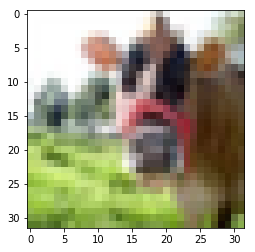

In [11]:
img = X['data'][0].reshape((3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

In [13]:
save_images(data_base, X, 'train', fine_label_names)

02974_67_ray.jpg:   6%|▌         | 2975/50000 [00:02<00:41, 1133.88it/s]         IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

07127_60_plain.jpg:  14%|█▍        | 7128/50000 [00:05<00:35, 1220.69it/s]       IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11355_3_bear.jpg:  23%|██▎       | 11356/50000 [00:09<00:31, 1224.31it/s]         IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in ord

In [2]:
img_list = np.loadtxt('/data/Images/cifar100/source/train/image.list', dtype=np.str)

In [4]:
img_list.shape

(50000,)

In [5]:
img_list[:100]

array(['00000_19_cattle.jpg', '00001_29_dinosaur.jpg',
       '00002_0_apple.jpg', '00003_11_boy.jpg',
       '00004_1_aquarium_fish.jpg', '00005_86_telephone.jpg',
       '00006_90_train.jpg', '00007_28_cup.jpg', '00008_23_cloud.jpg',
       '00009_31_elephant.jpg', '00010_39_keyboard.jpg',
       '00011_96_willow_tree.jpg', '00012_82_sunflower.jpg',
       '00013_17_castle.jpg', '00014_71_sea.jpg', '00015_39_keyboard.jpg',
       '00016_8_bicycle.jpg', '00017_97_wolf.jpg',
       '00018_80_squirrel.jpg', '00019_71_sea.jpg', '00020_74_shrew.jpg',
       '00021_59_pine_tree.jpg', '00022_70_rose.jpg',
       '00023_87_television.jpg', '00024_59_pine_tree.jpg',
       '00025_84_table.jpg', '00026_64_possum.jpg',
       '00027_52_oak_tree.jpg', '00028_42_leopard.jpg',
       '00029_64_possum.jpg', '00030_8_bicycle.jpg',
       '00031_17_castle.jpg', '00032_47_maple_tree.jpg',
       '00033_65_rabbit.jpg', '00034_21_chimpanzee.jpg',
       '00035_22_clock.jpg', '00036_81_streetcar.jpg', '0

## Save cifar100 test images

In [14]:
test_data = os.path.join(source_dir, 'test')
Y = unpickle(test_data)

In [15]:
Y.keys()

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

In [16]:
fine_label_names[Y['fine_labels'][0]]

'mountain'

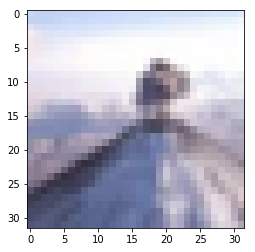

In [17]:
img = Y['data'][0].reshape((3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

In [19]:
save_images(data_base, Y, 'test', fine_label_names)


00205_23_cloud.jpg:   2%|▏         | 206/10000 [00:00<00:10, 920.63it/s]


00411_96_willow_tree.jpg:   4%|▍         | 412/10000 [00:00<00:10, 904.79it/s]


00616_46_man.jpg:   6%|▌         | 617/10000 [00:00<00:10, 898.81it/s]       


00820_36_hamster.jpg:   8%|▊         | 821/10000 [00:00<00:10, 906.06it/s]


00988_84_table.jpg:  10%|▉         | 989/10000 [00:01<00:09, 906.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


01696_10_bowl.jpg:  17%|█▋        | 1697/10000 [00:01<00:09, 897.67it/s]  


01899_9_bottle.jpg:  19%|█▉        | 1900/10000 [00:02<00:09, 899.32it/s]    


02101_89_tractor.jpg:  21%|██        | 2102/10000 [00:02<00:08, 893.57it/s]     


02305_11_boy.jpg:  23%|██▎       | 2306/10000 [00:02<00:08, 899.04it/s]       


02480_55_otter.jpg:  25%|██▍       | 2481/10000 [00:02<00:08, 920.06it/s]  Exception in thread Thread-4:
Traceback (most recent call last):
  File "/data/anaconda3/envs/OPOD/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/data/anaconda3/envs/OPOD/lib/python3.7/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/data/anaconda3/envs/OPOD/lib/python3.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

02989_82_sunflower.jpg:  30%|██▉       | 2990/10000 [00:03<00:06, 1122.86it/s]   IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

07950_42_leopard.jpg:  80%|███████▉  |